Importing Required Libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# Import train_test_split function
from sklearn.model_selection import train_test_split 

#Import svm model
from sklearn import svm 
from sklearn import metrics 

#Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix,roc_curve,roc_auc_score,accuracy_score, plot_confusion_matrix,classification_report

Importing Dataset

In [5]:
url="https://raw.githubusercontent.com/VinayakaShivakumar/ML_Dataset/main/Support%20Vector%20Machine/heart.csv"
df=pd.read_csv(url)

Reading Dataset

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Reading statistics of the Data set using describe fuction

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


visualizing the relationship between the age of the patient and their cholesterol levels by using a scatter plot.

Text(0.5, 1.0, 'Age-Cholesterol Plot')

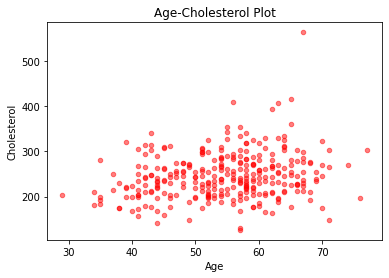

In [8]:
df.plot(kind = 'scatter',x = 'age', y = 'chol',alpha = 0.5, color = 'red')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Age-Cholesterol Plot')

separating the independent features and the target label for model training.

In [9]:
x = df.drop('target',axis = 1) 
y = df.target

Splitting data for training and testing

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=100)

Creating and Training SVM Classifier by tuning three hyper parameters((Kernel=rbf (radial basis function), C parameter and Gamma parameter)


In [11]:
from sklearn.model_selection import GridSearchCV

#Create a svm Classifier and hyper parameter tuning 
ml = svm.SVC() 
  
# defining parameter range
param_grid = {'C': [ 1, 10, 100, 1000,10000], 
              'gamma': [1,0.1,0.01,0.001,0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(ml, param_grid, refit = True, verbose = 1,cv=15)
  
# fitting the model for grid search
grid_search=grid.fit(x_train, y_train)

Fitting 15 folds for each of 25 candidates, totalling 375 fits


Finding the best hyperparameters from GridsearchCV and the corresponding accuracy score.

In [12]:
print(grid_search.best_params_)

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}


Using C=100 and gamma= 0.0001 as hyper parameters values to check the accuracy of the model

In [13]:
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset with tuning is : 81.00%


Finding the model accuracy for test data set

In [14]:
y_test_hat=grid.predict(x_test)
test_accuracy=accuracy_score(y_test,y_test_hat)*100
test_accuracy
print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )

Accuracy for our testing dataset with tuning is : 80.33%


Plotting Confusion matrix to find number of true positives, true negatives, false positives, and false negatives.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


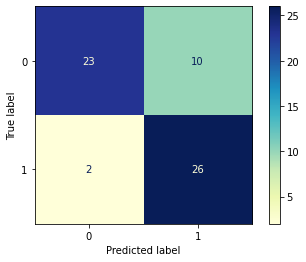

In [16]:
confusion_matrix(y_test,y_test_hat)
disp=plot_confusion_matrix(grid, x_test, y_test,cmap='YlGnBu')